In [14]:
from IPython.display import Latex
from IPython.display import Image
from IPython.core.display import HTML 

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import sqrt, pi
from labs import *

**Цель работы:** исследовать вынужденную прецессию гироскопа; установить зависимость скорости вынужденной прецессии от величины момента сил, действующих на ось гироскопа; определить скорость вращения ротора гироскопа и сравнить ее со скоростью, рассчитанной по скорости прецессии.

**В работе используются:** гироскоп в кардановом подвесе, секундомер, набор грузов, от- дельный ротор гироскопа, цилиндр известной массы, крутильный маятник, штангенциркуль, линейка.

**Для начала исмерим момент инерции ротора**

Момент инерции $I_{0}$ можно определить по крутильным колебаниям точной копии, подвеши- ваемой вдоль оси симметрии к жесткой проволоке с модулем кручения $f$:
$$T = 2 \pi \sqrt{\frac{I_{0}}{f}}$$
Чтобы исключить f подвешивают цилиндр правильной формы с моментом инерции $I_{ц}$, таким образом имеем:
$$I_{0} = I_{ц} \frac{T_{0}^2}{T_{ц}^2}$$

In [16]:
I0 = Value(7.9 * 10 ** (-4), 7.9 * 10 ** (-4) * 0.014)
I0

(0.00079±0.00001)

Введем физические параметры системы и нашего мира.

In [17]:
g = Value(9.81, 0.01)
a = Value(0.119, 0.001)
m = Value(1.16168, 0.01)
r = Value(0.082, 0.002) / 2

Проведем измерения времени вращенияя с разными массами и запишем результаты в csv файл. Для постороения графика $\omega$ от $M$ посчитаем их по формулам:
$$\omega = \frac{2\pi}{\frac{T}{N}}$$
$$M = mg * a$$

In [18]:
p = pd.read_csv("data.csv")
p["m"] = p["m"].agg(const_err(0.001))
p["t"] = p["t"].agg(const_err(0.5))
p["M"] = p.m * a * g
p["tau"] = p["t"] / p["n"]
p["omega"] = 2 * pi / p["tau"]
p = p.drop(labels = [7],axis = 0)
p

,t,m,n,M,tau,omega
0,(117.8±0.5),(0.341±0.001),4,(0.398±0.004),(29.5±0.1),(0.213±0.001)
1,(149.2±0.5),(0.273±0.001),4,(0.318±0.003),(37.3±0.1),(0.168±0.001)
2,(169.±0.5),(0.178±0.001),3,(0.208±0.002),(56.3±0.2),(0.1115±0.0003)
3,(183.9±0.5),(0.219±0.001),4,(0.256±0.002),(46.±0.1),(0.1366±0.0004)
4,(213.8±0.5),(0.141±0.001),3,(0.165±0.002),(71.3±0.2),(0.0881±0.0002)
5,(260.2±0.5),(0.116±0.001),3,(0.136±0.002),(86.7±0.2),(0.0724±0.0001)
6,(327.5±0.5),(0.093±0.001),3,(0.108±0.001),(109.2±0.2),(0.0576±0.0001)
8,(358.4±0.5),(0.057±0.001),2,(0.066±0.001),(179.2±0.2),(0.03507±0.00005)


Ну а теперь построим график и апроксимируем зависимость

In [19]:
def line(x, a, b):
    return a * x + b

params, cov = curve_fit(line, xdata= p["M"], ydata=p["omega"], )
k = Value(params[0], np.sqrt(cov[0][0]))
b = Value(params[1], np.sqrt(cov[1][1]))
k, b

((0.534±0.002), (-0.±0.001))

Вытащим из коэффициента наклона графика частоту вращения ротора:
$$ \omega_{р} = k * I_{0} * 2\pi$$
В оборотах в минуту это вот столько:

In [20]:
omega0 = 1 / (k * I0)
omega0 / (2 * pi)

(377.1±5.5)

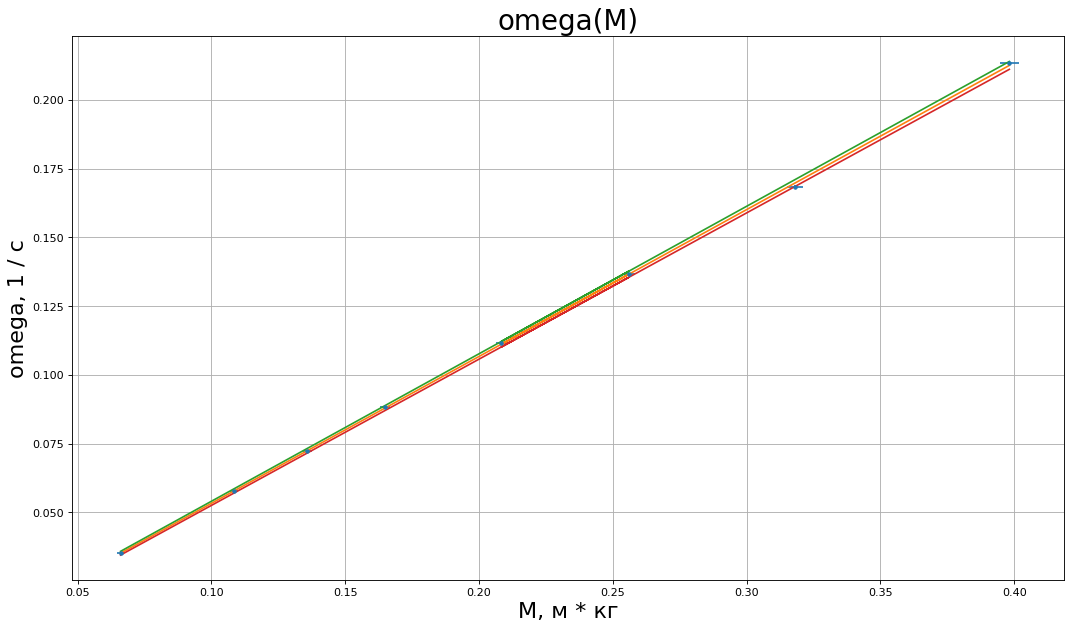

In [21]:
plt.figure(figsize=(16, 9), dpi=80)
plt.errorbar(x=p["M"].agg(get_var), y=p["omega"].agg(get_var),
                xerr=p["M"].agg(get_err), yerr=p["omega"].agg(get_err), fmt='.')
plt.grid(True)
plt.title("omega(M)", fontsize=25)
plt.xlabel("M, м * кг", fontsize=20)
plt.ylabel("omega, 1 / с", fontsize=20)
plt.plot(p["M"], line(p["M"], params[0], params[1]), label="Истиная зависимость")
plt.plot(p["M"], line(p["M"], params[0] + k.err, params[1] + b.err))
plt.plot(p["M"], line(p["M"], params[0] - k.err, params[1] - b.err))

Посчитаем момент сил опускания рычага:
$$M_{тр} = I_{0} * \omega_{0} * \omega_{р}

In [22]:
omega0

(2369.2±34.7)

In [23]:
I0 * omega0 * Value(0.0006)

(0.00112±0.00002)

In [24]:
p = pd.read_csv("data1.csv")
p

,omega,d_omega,M,d_M
0,0.034,0.00010,0.067,0.0013
1,0.046,0.00006,0.090,0.0014
2,0.057,0.00004,0.110,0.0015
3,0.071,0.00010,0.137,0.0016
4,0.085,0.00008,0.165,0.0018
5,0.106,0.00020,0.207,0.0020
6,0.131,0.00020,0.255,0.0024
7,0.166,0.00040,0.319,0.0029
8,0.205,0.00190,0.399,0.0035


In [25]:
def line(x, a, b):
    return a * x + b

params, cov = curve_fit(line, xdata= p["M"], ydata=p["omega"], )
k = Value(params[0], np.sqrt(cov[0][0]))
b = Value(params[1], np.sqrt(cov[1][1]))
k, b

((0.516±0.002), (-0.±0.001))

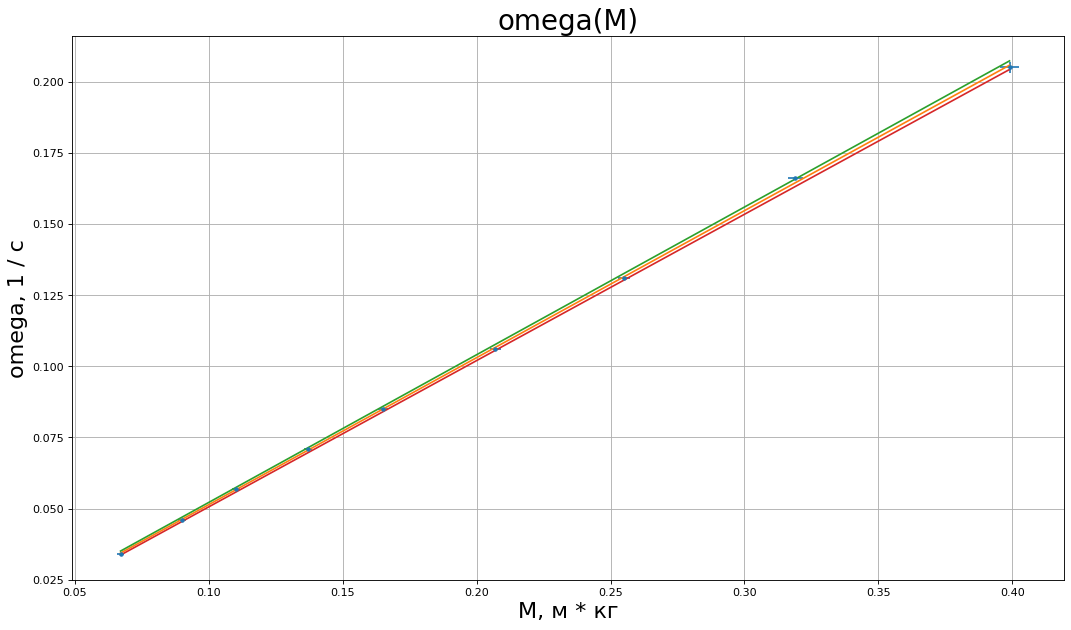

In [26]:
plt.figure(figsize=(16, 9), dpi=80)
plt.errorbar(x=p["M"], y=p["omega"],
                xerr=p["d_M"], yerr=p["d_omega"], fmt='.')
plt.grid(True)
plt.title("omega(M)", fontsize=25)
plt.xlabel("M, м * кг", fontsize=20)
plt.ylabel("omega, 1 / с", fontsize=20)
plt.plot(p["M"], line(p["M"], params[0], params[1]), label="Истиная зависимость")
plt.plot(p["M"], line(p["M"], params[0] + k.err, params[1] + b.err))
plt.plot(p["M"], line(p["M"], params[0] - k.err, params[1] - b.err))

In [27]:
plt.savefig('saved_figure.png')

<Figure size 432x288 with 0 Axes>